# Binomialfördelning

## Dynamisk Visualisering

In [1]:
import random
import math
import matplotlib.pyplot as plt
import matplotlib.animation as ani

In [2]:
class Binomial:
    def __init__(self, n: int, p: float) -> None:
        """
        En klass som representerar en binomialfördelning. *X~B(*`n`*,* `p`*).*

        ---

        ## Parametrar

        `n (int)`: Totala antalet försök. **Måste vara mer än 0.**  
        `p (float)`: Sannolikheten för ett lyckat försök. **Måste vara inom intervallet [0, 1].**

        ---

        ## Errorfall

        ### TypeError

        - `n` är ej av typen `int`.
        - `p` är ej av typen `float`.

        ### ValueError

        - `n` är 0 eller mindre.
        - `p` är utanför intervallet [0, 1].
        """
        self.n = n
        self.p = p
        self.alla_x = list(range(n + 1))

    @property
    def n(self) -> int:
        """
        Totala antalet försök. **Måste vara mer än 0.**
        """
        return self._n
    @n.setter
    def n(self, val) -> None:
        if not isinstance(val, int):
            raise TypeError(f"Tried to set to value of type '{type(val).__name__}'; must be 'int'")
        if val <= 0:
            raise ValueError(f"Tried to set to {val}; must be greater than 0")
        self._n = val
    @property
    def p(self) -> int:
        """
        Sannolikheten för ett lyckat försök. **Måste vara inom intervallet [0, 1].**
        """
        return self._p
    @p.setter
    def p(self, val) -> None:
        if not isinstance(val, float):
            raise TypeError(f"Tried to set to value of type '{type(val).__name__}'; must be 'float'")
        if val < 0 or val > 1:
            raise ValueError(f"Tried to set to {val}; must be in range [0, 1]")
        self._p = val

    def __repr__(self):
        return f"Binomial(n={self.n}, p={self.p})"
    def __str__(self):
        return f"B({self.n}, {self.p})"

    def sannolikhet(self, x: int) -> float:
        """
        Ger sannolikheten för utfallet `x`, alltså *P(X =* `x`*).*

        ---

        ## Parametrar

        `x (int)`: Utfallet att ge sannolikheten för. **Måste vara inom intervallet [0, n] där n är totala antalet försök.**

        ---

        ## Errorfall

        ### TypeError

        - `x` är ej av typen `int`.

        ### ValueError

        - `x` är utanför intervallet [0, n].
        """
        if not isinstance(x, int):
            raise TypeError(f"'x' was given a value of type {type(x).__name__}; must be 'int'")
        if x not in self.alla_x:
            raise ValueError(f"'x' was given the value {x}; must be in range [0, {self.n}]")
        return math.comb(self.n, x)*self.p**x*(1 - self.p)**(self.n - x)
    def väntevärde(self) -> float:
        """
        Ger väntevärdet (*E(X)*) för denna binomialfördelning.
        """
        return self.n*self.p
    def varians(self) -> float:
        """
        Ger variansen (*V(X)*) för denna binomialfördelning.
        """
        return self.n*self.p*(1 - self.p)
    def standardavvikelse(self) -> float:
        """
        Ger standardavvikelsen (*S(X)*) för denna binomialfördelning.
        """
        return math.sqrt(self.varians)
    def gör_test(self) -> int:
        """
        Utför ett test med denna binomialfördelnings attributer.  
        **Returnerar testets utfall.**
        """
        return sum([random.random() < self.p for _ in range(self.n)])
    def graf(self, rita: bool = False) -> plt.Axes | None:
        """
        Skapar ett stapeldiagram för denna binomialfördelning.

        ---

        ## Parametrar

        `rita (bool)`: Sätt till `True` om grafen ska ritas innan returnering; `False` annars.

        ---

        ## Returnerar

        - `Axes` om `rita` är satt till False.
        - `None` om `rita` är satt till True.

        ## Errorfall

        ### TypeError

        - `rita` är ej av typen `bool`.
        """
        if not isinstance(rita, bool):
            raise TypeError(f"'rita' was given a value of type '{type(rita).__name__}'; must be 'bool'")
        fig, ax = plt.subplots()
        ax.bar(self.alla_x, [self.sannolikhet(x) for x in self.alla_x])
        if rita:
            plt.title(f"Sannolikhetsfördelning\n"\
                      f"X~{self}\n"\
                      f"E(X)={round(self.väntevärde(), 3)}, V(X)={round(self.varians(), 3)}")
            plt.ylabel("Sannolikhet")
            plt.xlabel("x")
            plt.show()
            return None
        else:
            return ax

In [54]:
antal_försök = 20
sannolikhet = 0.5
stickprov = {x: 0 for x in range(antal_försök + 1)}

### Förväntad Fördelning

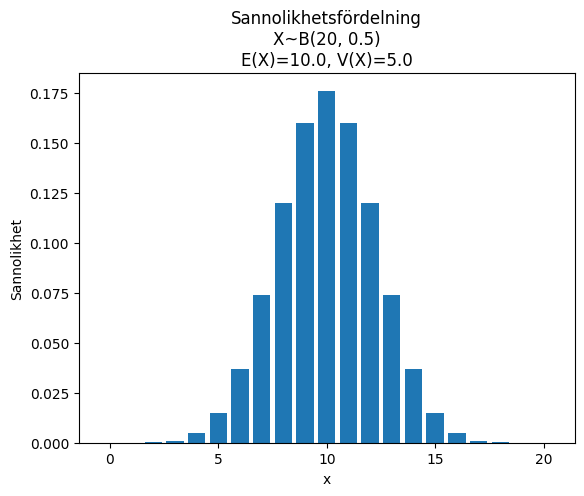

In [55]:
min_fördelning = Binomial(antal_försök, sannolikhet)
min_fördelning.graf(True)

### Stegvis Dynamisk Fördelning

In [56]:
# Återställ stickprov
stickprov = {x: 0 for x in range(antal_försök + 1)}

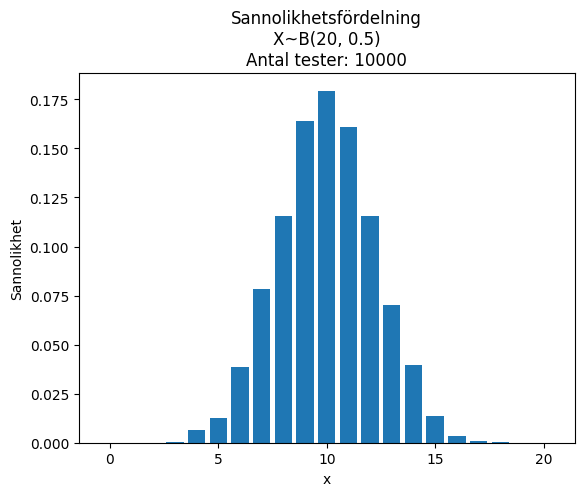

In [64]:
antal_tester = 1000
for _ in range(antal_tester):
    stickprov[min_fördelning.gör_test()] += 1

fig, ax = plt.subplots()
ax.bar(stickprov.keys(), [val/sum(stickprov.values()) for val in stickprov.values()])
plt.title(f"Sannolikhetsfördelning\nX~{min_fördelning}\nAntal tester: {sum(stickprov.values())}")
plt.ylabel("Sannolikhet")
plt.xlabel("x")
plt.show()

### Animerad Fördelning

MovieWriter ffmpeg unavailable; using Pillow instead.


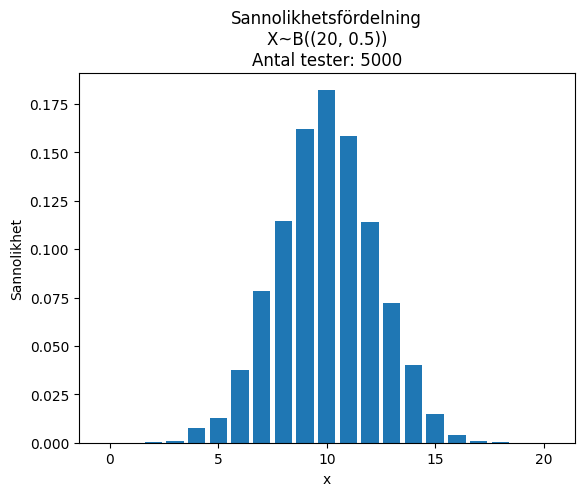

In [59]:
stickprov = {x: 0 for x in range(antal_försök + 1)}

antal_tester = 5000
tester_per_frame = 10
frames = antal_tester//tester_per_frame

fig, ax = plt.subplots()
patches = ax.bar(stickprov.keys(), 0).patches

def start():
    plt.ylim(0, 1.05)
    plt.ylabel("Sannolikhet")
    plt.xlabel("x")

def update(frame):
    for _ in range(tester_per_frame):
        stickprov[min_fördelning.gör_test()] += 1
    for x, rect in enumerate(patches):
        rect.set_height(stickprov[x]/sum(stickprov.values()))
    plt.ylim(0, (max(stickprov.values())/sum(stickprov.values())*1.05 + plt.ylim()[1]*5)/6)
    plt.title(f"Sannolikhetsfördelning\n"\
              f"X~B({antal_försök, sannolikhet})\n"\
              f"Antal tester: {(frame + 1)*tester_per_frame}")

anim = ani.FuncAnimation(fig=fig, func=update, frames=frames, init_func=start)
anim.save(filename="Animationer/BinomialAnimation.gif", fps=15)
plt.show()